# Steps for K-Fold Cross Validation

1. Split the data into K **equal** partitions (or 'folds')
1. Use fold 1 as **testing set** and the union of other folds as **training set**
1. Calculate **testing accuracy**
1. Repeat steps 2 and 3 K times, using a **different fold** each time
1. Use the **average testing accuracy** as the estimate of out-of sample accuracy

## Recommendations

- Use **CV = 10**
- For **classification problems**, use **Stratified Sampling**
    - Each response class should be represented with equal proportion in each fold
    - Scikit learn's __cross_val_score__ does this by default

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy', n_jobs = -1)    # n_jobs = -1 means all processors
scores.mean()

0.96666666666666679

# Search for optimal value of KNN's K - Using Cross Validation

In [10]:
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X, y)
    scores.append(cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy', n_jobs = -1).mean())

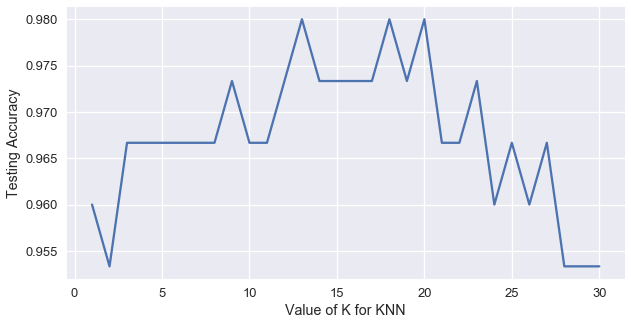

In [11]:
sns.set_context('talk')
plt.figure(figsize = (10, 5))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

> 20 turns out to be the best value of K for KNN

# Retraining with Best K

In [6]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X, y)
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array(['versicolor', 'versicolor'], dtype=object)